In [1]:
import pandas as pd
import sqlalchemy
import mysql.connector
import csv
import missingno as msno 
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import re
import matplotlib as mpl    
from matplotlib.patches import Patch


plt.style.use('seaborn')
sns.set_style('whitegrid')
%matplotlib inline



#Pour que python reconnaisse un dossier comme un module il faut ajouter en son sein un fichier __init__.py 
#et également l'ajouter au PATH

import sys  
data = pd.read_csv('/home/apprenant/Desktop/FARIZD/FOOD/Data/en.openfoodfacts.org.products.tsv', sep='\t')



#On peut ensuite importer le dossier comme un module


ModuleNotFoundError: No module named 'pandas'

In [71]:
data

code                                                url  \
0                3087  http://world-en.openfoodfacts.org/product/0000...   
1                4530  http://world-en.openfoodfacts.org/product/0000...   
2                4559  http://world-en.openfoodfacts.org/product/0000...   
3               16087  http://world-en.openfoodfacts.org/product/0000...   
4               16094  http://world-en.openfoodfacts.org/product/0000...   
...               ...                                                ...   
356022       99567453  http://world-en.openfoodfacts.org/product/9956...   
356023  9970229501521  http://world-en.openfoodfacts.org/product/9970...   
356024  9977471758307  http://world-en.openfoodfacts.org/product/9977...   
356025  9980282863788  http://world-en.openfoodfacts.org/product/9980...   
356026   999990026839  http://world-en.openfoodfacts.org/product/9999...   

                           creator   created_t      created_datetime  \
0       openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   
1                  usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
2                  usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
3                  usda-ndb-import  1489055731  2017-03-09T10:35:31Z   
4                  usda-ndb-import  1489055653  2017-03-09T10:34:13Z   
...                            ...         ...                   ...   
356022             usda-ndb-import  1489059076  2017-03-09T11:31:16Z   
356023                      tomato  1422099377  2015-01-24T11:36:17Z   
356024  openfoodfacts-contributors  1497018549  2017-06-09T14:29:09Z   
356025  openfoodfacts-contributors  1492340089  2017-04-16T10:54:49Z   
356026             usda-ndb-import  1489072709  2017-03-09T15:18:29Z   

       last_modified_t last_modified_datetime  \
0           1474103893   2016-09-17T09:18:13Z   
1           1489069957   2017-03-09T14:32:37Z   
2           1489069957   2017-03-09T14:32:37Z   
3           1489055731   2017-03-09T10:35:31Z   
4           1489055653   2017-03-09T10:34:13Z   
...                ...                    ...   
356022      1491244499   2017-04-03T18:34:59Z   
356023      1491244499   2017-04-03T18:34:59Z   
356024      1500730305   2017-07-22T13:31:45Z   
356025      1492340089   2017-04-16T10:54:49Z   
356026      1491244499   2017-04-03T18:34:59Z   

                                             product_name  \
0                                      Farine de blé noir   
1                          Banana Chips Sweetened (Whole)   
2                                                 Peanuts   
3                                  Organic Salted Nut Mix   
4                                         Organic Polenta   
...                                                   ...   
356022  Mint Melange Tea A Blend Of Peppermint, Lemon ...   
356023                                            乐吧泡菜味薯片   
356024                                      Biscottes bio   
356025                           Tomates aux Vermicelles    
356026                    Sugar Free Drink Mix, Peach Tea   

                           generic_name quantity  ...  \
0                                   NaN      1kg  ...   
1                                   NaN      NaN  ...   
2                                   NaN      NaN  ...   
3                                   NaN      NaN  ...   
4                                   NaN      NaN  ...   
...                                 ...      ...  ...   
356022                              NaN      NaN  ...   
356023  Leba pickle flavor potato chips     50 g  ...   
356024                              NaN     300g  ...   
356025                              NaN      67g  ...   
356026                              NaN      NaN  ...   

       fruits-vegetables-nuts_100g fruits-vegetables-nuts-estimate_100g  \
0                              NaN                                  NaN   
1                              NaN                                  NaN   
2      

# Lecture de la data

J'importe mon fichier tsv que je lis, la données étant importante je recupere 30000 lignes aléatoirement grâce au .sample qui correspond à 10% de la base de données

In [72]:
print(data.head())



    code                                                url  \
0   3087  http://world-en.openfoodfacts.org/product/0000...   
1   4530  http://world-en.openfoodfacts.org/product/0000...   
2   4559  http://world-en.openfoodfacts.org/product/0000...   
3  16087  http://world-en.openfoodfacts.org/product/0000...   
4  16094  http://world-en.openfoodfacts.org/product/0000...   

                      creator   created_t      created_datetime  \
0  openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   
1             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
2             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
3             usda-ndb-import  1489055731  2017-03-09T10:35:31Z   
4             usda-ndb-import  1489055653  2017-03-09T10:34:13Z   

  last_modified_t last_modified_datetime                    product_name  \
0      1474103893   2016-09-17T09:18:13Z              Farine de blé noir   
1      1489069957   2017-03-09T14:32:37Z  Banana Chips Sweetened (

In [73]:
print(data.dtypes)

code                        object
url                         object
creator                     object
created_t                   object
created_datetime            object
                            ...   
carbon-footprint_100g      float64
nutrition-score-fr_100g    float64
nutrition-score-uk_100g    float64
glycemic-index_100g        float64
water-hardness_100g        float64
Length: 163, dtype: object


In [74]:
print(data.columns.values)

['code' 'url' 'creator' 'created_t' 'created_datetime' 'last_modified_t'
 'last_modified_datetime' 'product_name' 'generic_name' 'quantity'
 'packaging' 'packaging_tags' 'brands' 'brands_tags' 'categories'
 'categories_tags' 'categories_en' 'origins' 'origins_tags'
 'manufacturing_places' 'manufacturing_places_tags' 'labels' 'labels_tags'
 'labels_en' 'emb_codes' 'emb_codes_tags' 'first_packaging_code_geo'
 'cities' 'cities_tags' 'purchase_places' 'stores' 'countries'
 'countries_tags' 'countries_en' 'ingredients_text' 'allergens'
 'allergens_en' 'traces' 'traces_tags' 'traces_en' 'serving_size'
 'no_nutriments' 'additives_n' 'additives' 'additives_tags' 'additives_en'
 'ingredients_from_palm_oil_n' 'ingredients_from_palm_oil'
 'ingredients_from_palm_oil_tags'
 'ingredients_that_may_be_from_palm_oil_n'
 'ingredients_that_may_be_from_palm_oil'
 'ingredients_that_may_be_from_palm_oil_tags' 'nutrition_grade_uk'
 'nutrition_grade_fr' 'pnns_groups_1' 'pnns_groups_2' 'states'
 'states_tags' 

### J'affiche les colonnes je remarque qu'il y a certaines redondanse que je vais vérifier par la suite ce qui me permet d'avoir aussi déjà qu'elle donnée peux m'intérrésser ou non pour le calcul de mon nutriscore 

In [75]:
msno.matrix(data)

## Tentative de graphique des données des valeur manquante non lisible je regarde dont avec la méthode num_missing qui compte les valeur manquante ceux qui sont = à 30000 je vais donc les supprimer 

In [8]:
def num_missing(x):
    return sum(x.isnull())

print(data.apply(num_missing, axis=0).values)

[    26     26      3      3     10      0      0  17512 298313 236742
 266068 266068  29050  29070 252728 252752 252726 330977 331015 314019
 314026 296929 296849 296823 323537 323541 335155 356001 333525 289462
 298326    275    275    275  72134 318851 356007 327606 327633 327607
 139406 356027  72160  72202 185838 185838  72160 356027 349455  72160
 356027 341699 356027 101171 227021 223338     52     52     52 252778
 252778 280302 280302  60660 355158  76530  92204 356027 356027 356026
 356025 356023 356026 356026 356026 356000 356001 356027 356027 356026
 356027 332987 332952 355089 355826 355984 355938 355820 355868 356018
 356000 356001 356002 356012 356027 356011 356027 356027 356027 212584
 211857  76807  76841 355942 355995 355983 355749 356021 356016 355736
 355576 135344  61866 355998 356010 356018  66288  66333 351450 218321
 355992 348820 354555 355097 214967 344750 345102 344196 349130 350697
 352981 350637 355696 353476 355954 355928 331179 355829 214510 350089
 21536

In [9]:
def num_missing(x):
    return sum(x.isnull())
# On applique cette fonction pour chaque colonne:
print("Valeurs manquantes par colonne:")
print(data.apply(num_missing, axis=0))

Valeurs manquantes par colonne:
code                           26
url                            26
creator                         3
created_t                       3
created_datetime               10
                            ...  
carbon-footprint_100g      355749
nutrition-score-fr_100g    101171
nutrition-score-uk_100g    101171
glycemic-index_100g        356027
water-hardness_100g        356027
Length: 163, dtype: int64


## Cette méthode me permet d'avoir certain nom de colonne mais surtout de voir que j'ai 163 colonnes pour le moment 

In [10]:
def msv1(data, thresh=20, color='black', edgecolor='black', width=30, height=6):
    
    plt.figure(figsize=(width,height))
    percentage=(data.isnull().mean())*100
    percentage.sort_values(ascending=False).plot.bar(color=color, edgecolor=edgecolor)
    plt.axhline(y=thresh, color='r', linestyle='-')
    plt.title('Missing values percentage per column', fontsize=20, weight='bold' )
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+12.5, 'Columns with more than %s%s missing values' %(thresh, '%'), fontsize=12,weight='bold', color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 5, 'Columns with less than %s%s missing values' %(thresh, '%'), fontsize=12,weight='bold', color='blue',
         ha='left' ,va='top')
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage', weight='bold')
    plt.yticks(weight ='bold') 
    
    return plt.show()

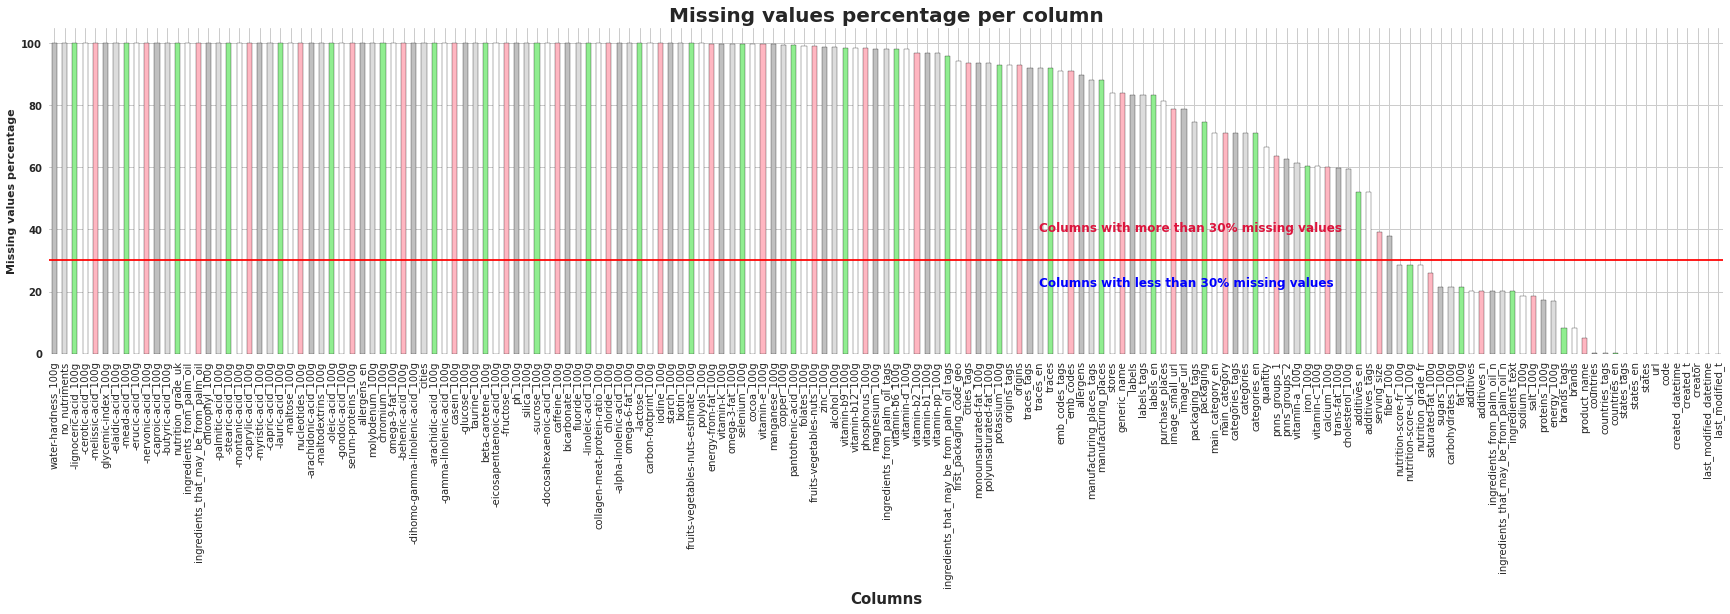

In [11]:
count_null = data.isnull().sum()/ data.shape[0] * 100
count_null

code                         0.007303
url                          0.007303
creator                      0.000843
created_t                    0.000843
created_datetime             0.002809
                              ...    
carbon-footprint_100g       99.921916
nutrition-score-fr_100g     28.416665
nutrition-score-uk_100g     28.416665
glycemic-index_100g        100.000000
water-hardness_100g        100.000000
Length: 163, dtype: float64

### Count_null me permet d'avoir les info en pourcentage des données manquantes 

In [12]:
#Empty Column >= 100%
null_col = count_null[count_null >= 100].index
null_col

Index(['no_nutriments', 'ingredients_from_palm_oil',
       'ingredients_that_may_be_from_palm_oil', 'nutrition_grade_uk',
       '-butyric-acid_100g', '-caproic-acid_100g', '-lignoceric-acid_100g',
       '-cerotic-acid_100g', '-melissic-acid_100g', '-elaidic-acid_100g',
       '-mead-acid_100g', '-erucic-acid_100g', '-nervonic-acid_100g',
       'chlorophyl_100g', 'glycemic-index_100g', 'water-hardness_100g'],
      dtype='object')

### Grâce au pourcentage récuppérer cette ligne me permet d'avoir les noms de colonnes qui ont 100% des données manquantes

In [13]:
data = data.drop(['no_nutriments', 'ingredients_from_palm_oil',
       'ingredients_that_may_be_from_palm_oil', 'nutrition_grade_uk',
       '-butyric-acid_100g', '-caproic-acid_100g', '-caprylic-acid_100g',
       '-capric-acid_100g', '-lauric-acid_100g', '-myristic-acid_100g',
       '-palmitic-acid_100g', '-stearic-acid_100g', '-lignoceric-acid_100g',
       '-cerotic-acid_100g', '-montanic-acid_100g', '-melissic-acid_100g',
       '-elaidic-acid_100g', '-mead-acid_100g', '-erucic-acid_100g',
       '-nervonic-acid_100g', '-maltose_100g', 'nucleotides_100g',
       'chromium_100g', 'molybdenum_100g', 'chlorophyl_100g',
       'glycemic-index_100g', 'water-hardness_100g'], axis=1) 

### Je supprime donc les colonnes avec les 100% de données manquante  je verifie en dessous combien il me reste de colonnes 136 c'est correct car au début nous étions à 163 

In [14]:
data.shape

(356027, 136)

In [15]:
print(data.columns.values)

['code' 'url' 'creator' 'created_t' 'created_datetime' 'last_modified_t'
 'last_modified_datetime' 'product_name' 'generic_name' 'quantity'
 'packaging' 'packaging_tags' 'brands' 'brands_tags' 'categories'
 'categories_tags' 'categories_en' 'origins' 'origins_tags'
 'manufacturing_places' 'manufacturing_places_tags' 'labels' 'labels_tags'
 'labels_en' 'emb_codes' 'emb_codes_tags' 'first_packaging_code_geo'
 'cities' 'cities_tags' 'purchase_places' 'stores' 'countries'
 'countries_tags' 'countries_en' 'ingredients_text' 'allergens'
 'allergens_en' 'traces' 'traces_tags' 'traces_en' 'serving_size'
 'additives_n' 'additives' 'additives_tags' 'additives_en'
 'ingredients_from_palm_oil_n' 'ingredients_from_palm_oil_tags'
 'ingredients_that_may_be_from_palm_oil_n'
 'ingredients_that_may_be_from_palm_oil_tags' 'nutrition_grade_fr'
 'pnns_groups_1' 'pnns_groups_2' 'states' 'states_tags' 'states_en'
 'main_category' 'main_category_en' 'image_url' 'image_small_url'
 'energy_100g' 'energy-from-fa

### Maintenant j'identifie les métadonnées et les supprimes car non utile 

In [16]:
data = data.drop(['code','url','creator','created_t','created_datetime','last_modified_t'
,'last_modified_datetime'], axis=1) 

In [17]:
data.shape

(356027, 129)

In [18]:
print(data.columns.values)

['product_name' 'generic_name' 'quantity' 'packaging' 'packaging_tags'
 'brands' 'brands_tags' 'categories' 'categories_tags' 'categories_en'
 'origins' 'origins_tags' 'manufacturing_places'
 'manufacturing_places_tags' 'labels' 'labels_tags' 'labels_en'
 'emb_codes' 'emb_codes_tags' 'first_packaging_code_geo' 'cities'
 'cities_tags' 'purchase_places' 'stores' 'countries' 'countries_tags'
 'countries_en' 'ingredients_text' 'allergens' 'allergens_en' 'traces'
 'traces_tags' 'traces_en' 'serving_size' 'additives_n' 'additives'
 'additives_tags' 'additives_en' 'ingredients_from_palm_oil_n'
 'ingredients_from_palm_oil_tags'
 'ingredients_that_may_be_from_palm_oil_n'
 'ingredients_that_may_be_from_palm_oil_tags' 'nutrition_grade_fr'
 'pnns_groups_1' 'pnns_groups_2' 'states' 'states_tags' 'states_en'
 'main_category' 'main_category_en' 'image_url' 'image_small_url'
 'energy_100g' 'energy-from-fat_100g' 'fat_100g' 'saturated-fat_100g'
 '-arachidic-acid_100g' '-behenic-acid_100g' 'monounsatura

## J'imprime mes colonnes et je choisie celle que je vais garder

In [19]:
data = data[['countries', 'categories', 'product_name', 'energy_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g','salt_100g', 'sodium_100g', 'saturated-fat_100g','fat_100g', 'nutrition-score-fr_100g', 'nutrition_grade_fr','additives_n','additives','additives_tags']]

In [20]:
data.head()

countries categories                    product_name  energy_100g  \
0     en:FR        NaN              Farine de blé noir          NaN   
1        US        NaN  Banana Chips Sweetened (Whole)       2243.0   
2        US        NaN                         Peanuts       1941.0   
3        US        NaN          Organic Salted Nut Mix       2540.0   
4        US        NaN                 Organic Polenta       1552.0   

   sugars_100g  fiber_100g  proteins_100g  salt_100g  sodium_100g  \
0          NaN         NaN            NaN        NaN          NaN   
1        14.29         3.6           3.57    0.00000        0.000   
2        17.86         7.1          17.86    0.63500        0.250   
3         3.57         7.1          17.86    1.22428        0.482   
4          NaN         5.7           8.57        NaN          NaN   

   saturated-fat_100g  fat_100g  nutrition-score-fr_100g nutrition_grade_fr  \
0                 NaN       NaN                      NaN                NaN   
1               28.57     28.57                     14.0                  d   
2                0.00     17.86                      0.0                  b   
3                5.36     57.14                     12.0                  d   
4                 NaN      1.43                      NaN                NaN   

   additives_n                                          additives  \
0          NaN                                                NaN   
1          0.0   [ bananas -> en:bananas  ]  [ vegetable-oil -...   
2          0.0   [ peanuts -> en:peanuts  ]  [ wheat-flour -> ...   
3          0.0   [ organic-hazelnuts -> en:organic-hazelnuts  ...   
4          0.0   [ organic-polenta -> en:organic-polenta  ]  [...   

  additives_tags  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN

In [21]:
data.shape

(356027, 16)

In [22]:
print(data.duplicated(['product_name']).value_counts()) 

False    249246
True     106781
dtype: int64


In [23]:
data.drop_duplicates(['product_name'], inplace=True)

## je compte les doublons dans product_name et les supprimes 

In [24]:
print(data.duplicated(['product_name']).value_counts()) 

False    249246
dtype: int64


In [25]:
data = data[data["product_name"].isnull() == False]

In [26]:
data.shape

(249245, 16)

Text(0.5, 1.0, 'countries')

  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/apprenant/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/apprenant/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/apprenant/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 48124 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/apprenant/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/apprenant/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 3611 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/apprenant/anaconda3/lib/python3.8

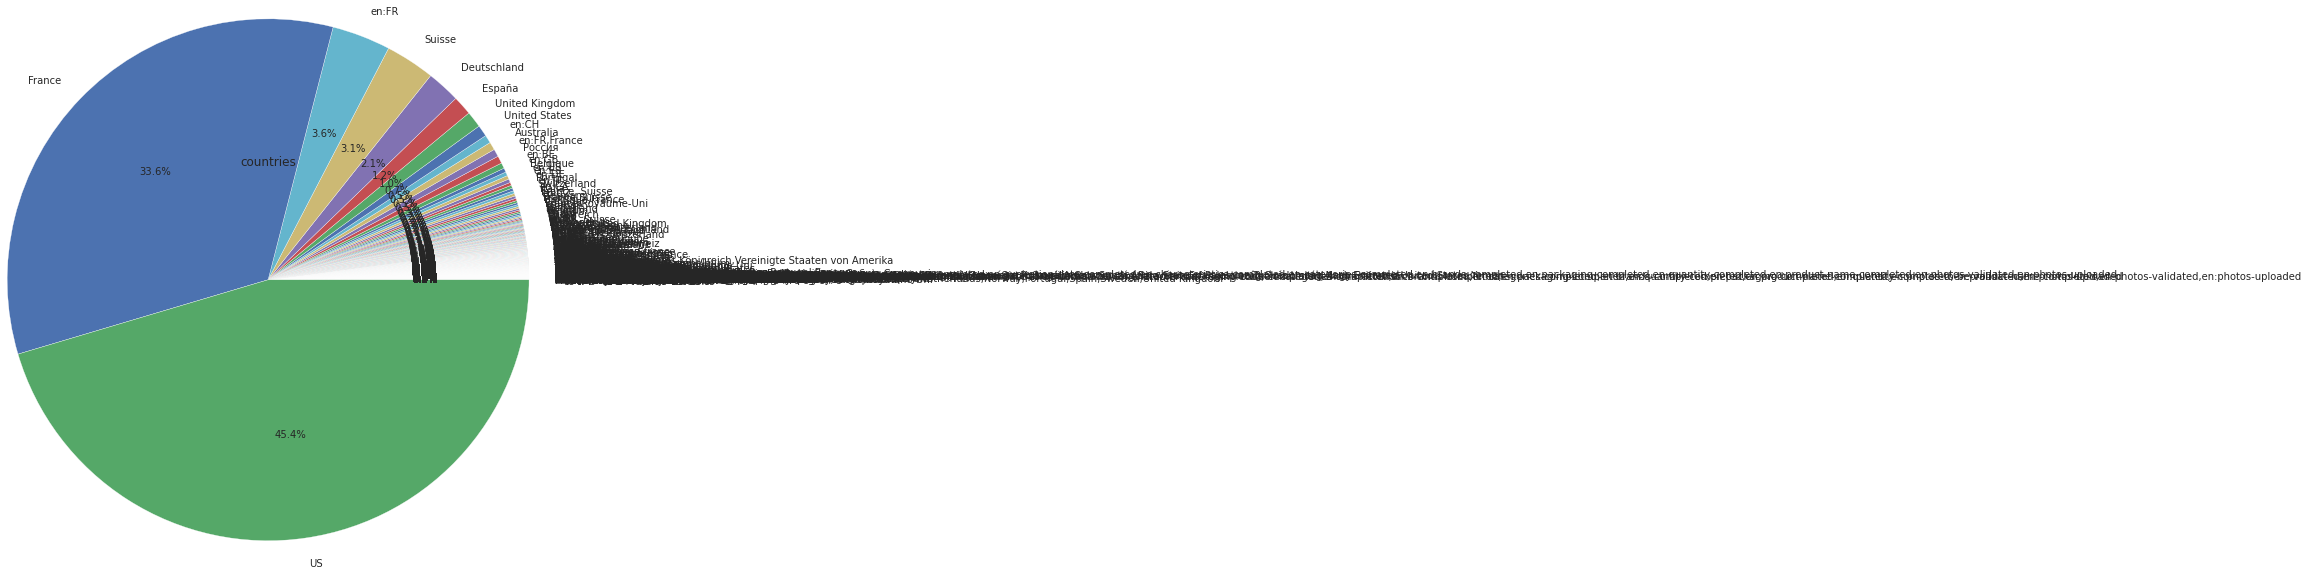

In [27]:
dat = data.groupby("countries").countries.count().sort_values()
dat.plot.pie(autopct="%.1f%%", radius=3)
plt.title("countries")

In [28]:
print (data[['countries']].sample(n=30))

             countries
296468         Ireland
223035          France
340992          España
142735              US
110393              US
282539         Germany
120580              US
29309           France
259757          France
24497               US
250409          France
144504              US
201326          France
104138              US
199262          France
303166          France
299939           Italy
167501              US
146294              US
120206              US
133244              US
157168              US
198722   Canada,France
56319               US
15001               US
115045          France
172184              US
85487               US
188129  United Kingdom
120557              US


In [29]:
data["countries"] = data["countries"].apply(
    lambda x: "France" if re.match(r".*(fr).*", str(x), re.IGNORECASE) else x )


In [30]:
data.countries == 'France'

0          True
1         False
2         False
3         False
4         False
          ...  
356021    False
356022    False
356023    False
356024     True
356025     True
Name: countries, Length: 249245, dtype: bool

## J'instegre tout les FR dans france et je ne garde plus que france dans country

In [31]:
data = data.loc[data.countries == 'France']

In [32]:
data.head()

countries     categories          product_name  energy_100g  sugars_100g  \
0      France            NaN    Farine de blé noir          NaN          NaN   
46     France            NaN   Naturablue original          NaN          NaN   
47     France  Filet de bœuf         Filet de bœuf          NaN          NaN   
51     France            NaN  Naturakrill original          NaN          NaN   
108    France            NaN        Lion Peanut x2          NaN          NaN   

     fiber_100g  proteins_100g  salt_100g  sodium_100g  saturated-fat_100g  \
0           NaN            NaN        NaN          NaN                 NaN   
46          NaN            NaN        NaN          NaN                 NaN   
47          NaN            NaN        NaN          NaN                 NaN   
51          NaN            NaN        NaN          NaN                 NaN   
108         NaN            NaN        NaN          NaN                 NaN   

     fat_100g  nutrition-score-fr_100g nutrition_grade_fr  additives_n  \
0         NaN                      NaN                NaN          NaN   
46        NaN                      NaN                NaN          NaN   
47        NaN                      NaN                NaN          NaN   
51        NaN                      NaN                NaN          NaN   
108       NaN                      NaN                NaN          NaN   

    additives additives_tags  
0         NaN            NaN  
46        NaN            NaN  
47        NaN            NaN  
51        NaN            NaN  
108       NaN            NaN

Text(0.5, 1.0, 'countries')

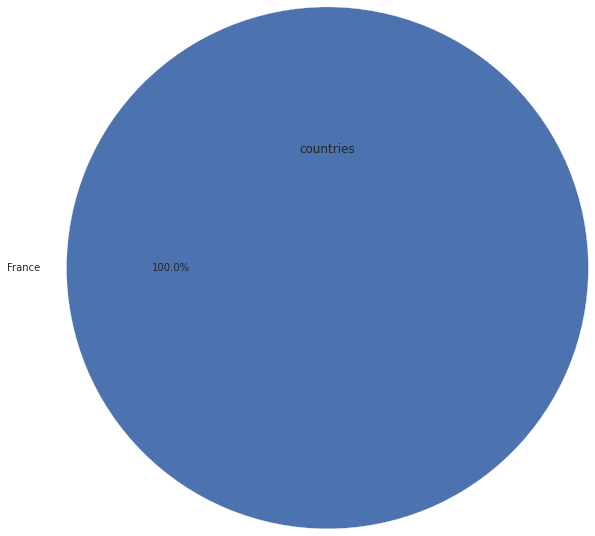

In [33]:
dat = data.groupby("countries").countries.count().sort_values()
dat.plot.pie(autopct="%.1f%%", radius=3)
plt.title("countries")

In [34]:
data.shape

(98144, 16)

In [35]:
data["product_name"].isnull().sum() 

0

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98144 entries, 0 to 356025
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   countries                98144 non-null  object 
 1   categories               58924 non-null  object 
 2   product_name             98144 non-null  object 
 3   energy_100g              77135 non-null  float64
 4   sugars_100g              75698 non-null  float64
 5   fiber_100g               51886 non-null  float64
 6   proteins_100g            76940 non-null  float64
 7   salt_100g                75734 non-null  float64
 8   sodium_100g              75730 non-null  float64
 9   saturated-fat_100g       75624 non-null  float64
 10  fat_100g                 64300 non-null  float64
 11  nutrition-score-fr_100g  74482 non-null  float64
 12  nutrition_grade_fr       74482 non-null  object 
 13  additives_n              68784 non-null  float64
 14  additives            

In [37]:
data = data.dropna(subset=['fat_100g','energy_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'sodium_100g', 'salt_100g', 'saturated-fat_100g'],how ='all')

## Je supprimes les lignes qui manque dans toutes les colonnes suivante

In [ ]:
data["salt_100g"].isnull().sum()

In [38]:
data['sodium_to_salt'] = data['sodium_100g'] * 2.54

In [39]:
data["sodium_to_salt"].isnull().sum()

1871

In [40]:
data[data["sodium_to_salt"]!= data["salt_100g"]].shape

(63161, 17)

In [67]:
data.loc[data["sodium_to_salt"].notna() & data["salt_100g"].isna(), "salt_100g"] = data["sodium_to_salt"]

In [ ]:
#df.loc[df["fruits-vegetables-nuts-estimate_100g"].notna() & df["fruits-vegetables-nuts_100g"].isna(), "fruits-vegetables-nuts_100g"] = df["fruits-vegetables-nuts-estimate_100g"]

In [69]:
data["salt_100g"].isnull().sum()

0

In [68]:
data.head()


countries                                         categories  \
185    France  Boissons,Boissons gazeuses,Sodas,Boissons sucr...   
189    France                  Snacks sucrés,Confiseries,Bonbons   
190    France                                       en:beverages   
193    France                                                NaN   
194    France                                                NaN   

                                          product_name  energy_100g  \
185                                          Root Beer        215.0   
189      Gotta-have grape, seriously strawberry flavor       1667.0   
190              Thé noir aromatisé violette et fleurs         17.0   
193  Preparation mug cake chocolat-caramel au beurr...       1632.0   
194                                     Mini Confettis       1753.0   

     sugars_100g  fiber_100g  proteins_100g  salt_100g  sodium_100g  \
185         13.6         0.0            0.0     0.0616     0.024200   
189         93.3         0.0            0.0     0.0000     0.000000   
190          0.1         0.0            0.1     0.0010     0.000394   
193         42.0         0.0            7.0     0.9750     0.383858   
194         87.7         0.9            0.6     0.0100     0.003937   

     saturated-fat_100g  fat_100g  nutrition-score-fr_100g nutrition_grade_fr  \
185                 0.0       0.0                     18.0                  e   
189                 0.0       0.0                     14.0                  d   
190                 0.1       0.1                      2.0                  c   
193                 4.5       7.0                     21.0                  e   
194                 0.8       0.0                     14.0                  d   

     additives_n                                          additives  \
185          3.0   [ eau-gazeifiee -> fr:eau-gazeifiee  ]  [ eau...   
189          NaN                                                NaN   
190          0.0   [ the-noir-aromatise-a-la-fleur-de-violette -...   
193          4.0   [ farine-de-ble -> fr:farine-de-ble  ]  [ far...   
194          NaN                                                NaN   

                                        additives_tags  sodium_to_salt  
185                            en:e150,en:e211,en:e999        0.061468  
189                                                NaN        0.000000  
190                                                NaN        0.001000  
193  en:e322,en:e322i,en:e450,en:e473,en:e500,en:e5...        0.975000  
194                                                NaN        0.010000

In [42]:
data.sodium_to_salt.head()

140         NaN
185    0.061468
189    0.000000
190    0.001000
193    0.975000
Name: sodium_to_salt, dtype: float64

In [43]:
data.head()

countries                                         categories  \
140    France                                                NaN   
185    France  Boissons,Boissons gazeuses,Sodas,Boissons sucr...   
189    France                  Snacks sucrés,Confiseries,Bonbons   
190    France                                       en:beverages   
193    France                                                NaN   

                                          product_name  energy_100g  \
140                                     Pack de 2 Twix       1481.0   
185                                          Root Beer        215.0   
189      Gotta-have grape, seriously strawberry flavor       1667.0   
190              Thé noir aromatisé violette et fleurs         17.0   
193  Preparation mug cake chocolat-caramel au beurr...       1632.0   

     sugars_100g  fiber_100g  proteins_100g  salt_100g  sodium_100g  \
140          NaN         6.2           6.25        NaN          NaN   
185         13.6         0.0           0.00     0.0616     0.024200   
189         93.3         NaN           0.00     0.0000     0.000000   
190          0.1         NaN           0.10     0.0010     0.000394   
193         42.0         0.0           7.00     0.9750     0.383858   

     saturated-fat_100g  fat_100g  nutrition-score-fr_100g nutrition_grade_fr  \
140                 NaN      4.17                      NaN                NaN   
185                 0.0      0.00                     18.0                  e   
189                 0.0      0.00                     14.0                  d   
190                 0.1      0.10                      2.0                  c   
193                 4.5      7.00                     21.0                  e   

     additives_n                                          additives  \
140          NaN                                                NaN   
185          3.0   [ eau-gazeifiee -> fr:eau-gazeifiee  ]  [ eau...   
189          NaN                                                NaN   
190          0.0   [ the-noir-aromatise-a-la-fleur-de-violette -...   
193          4.0   [ farine-de-ble -> fr:farine-de-ble  ]  [ far...   

                                        additives_tags  sodium_to_salt  
140                                                NaN             NaN  
185                            en:e150,en:e211,en:e999        0.061468  
189                                                NaN        0.000000  
190                                                NaN        0.001000  
193  en:e322,en:e322i,en:e450,en:e473,en:e500,en:e5...        0.975000

In [44]:
data.shape

(77601, 17)

<AxesSubplot:>

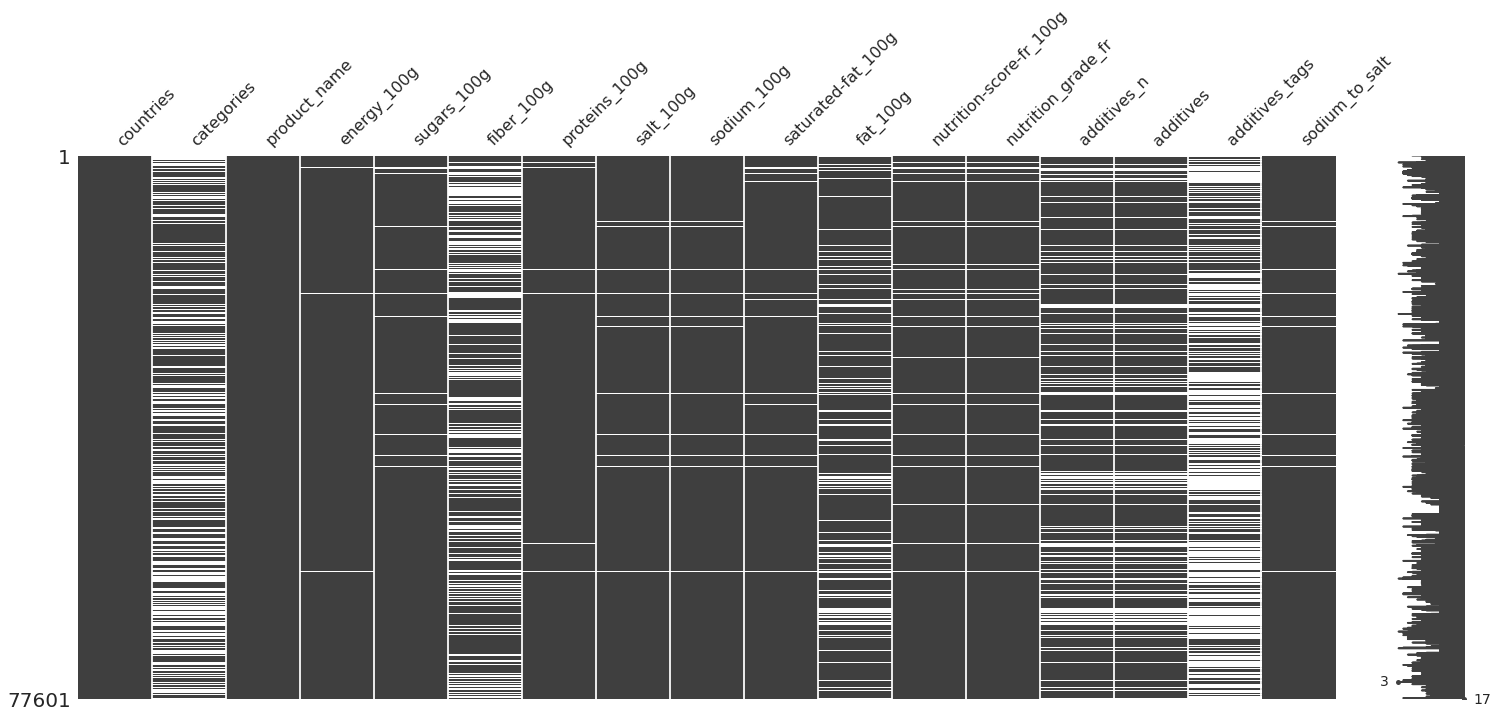

In [45]:
msno.matrix(data)

In [46]:
data.shape

(77601, 17)

In [47]:
data["nutrition_grade_fr"].isnull().sum() 

3185

In [48]:
your_list = ['fat_100g','energy_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'sodium_100g', 'saturated-fat_100g']
for i in your_list:
    data.loc[data[i].isnull(),i]=0

## Boucle qui permet de remplacer par 0 les lignes manquantes dans les colonnes

In [49]:
data = data[data["nutrition_grade_fr"].isnull() == False]

<AxesSubplot:>

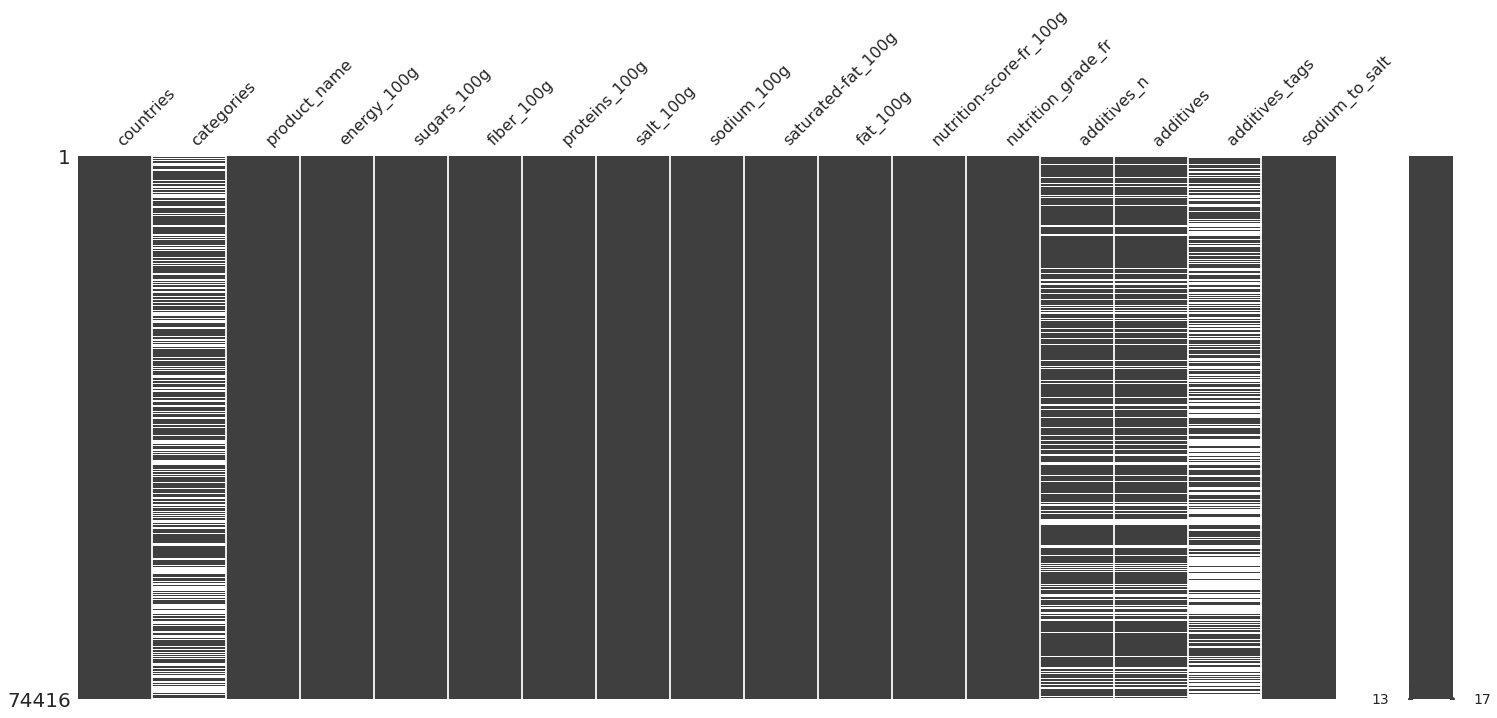

In [50]:
msno.matrix(data)

In [51]:
data.head()

countries                                         categories  \
185    France  Boissons,Boissons gazeuses,Sodas,Boissons sucr...   
189    France                  Snacks sucrés,Confiseries,Bonbons   
190    France                                       en:beverages   
193    France                                                NaN   
194    France                                                NaN   

                                          product_name  energy_100g  \
185                                          Root Beer        215.0   
189      Gotta-have grape, seriously strawberry flavor       1667.0   
190              Thé noir aromatisé violette et fleurs         17.0   
193  Preparation mug cake chocolat-caramel au beurr...       1632.0   
194                                     Mini Confettis       1753.0   

     sugars_100g  fiber_100g  proteins_100g  salt_100g  sodium_100g  \
185         13.6         0.0            0.0     0.0616     0.024200   
189         93.3         0.0            0.0     0.0000     0.000000   
190          0.1         0.0            0.1     0.0010     0.000394   
193         42.0         0.0            7.0     0.9750     0.383858   
194         87.7         0.9            0.6     0.0100     0.003937   

     saturated-fat_100g  fat_100g  nutrition-score-fr_100g nutrition_grade_fr  \
185                 0.0       0.0                     18.0                  e   
189                 0.0       0.0                     14.0                  d   
190                 0.1       0.1                      2.0                  c   
193                 4.5       7.0                     21.0                  e   
194                 0.8       0.0                     14.0                  d   

     additives_n                                          additives  \
185          3.0   [ eau-gazeifiee -> fr:eau-gazeifiee  ]  [ eau...   
189          NaN                                                NaN   
190          0.0   [ the-noir-aromatise-a-la-fleur-de-violette -...   
193          4.0   [ farine-de-ble -> fr:farine-de-ble  ]  [ far...   
194          NaN                                                NaN   

                                        additives_tags  sodium_to_salt  
185                            en:e150,en:e211,en:e999        0.061468  
189                                                NaN        0.000000  
190                                                NaN        0.001000  
193  en:e322,en:e322i,en:e450,en:e473,en:e500,en:e5...        0.975000  
194                                                NaN        0.010000

/home/apprenant/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of height')

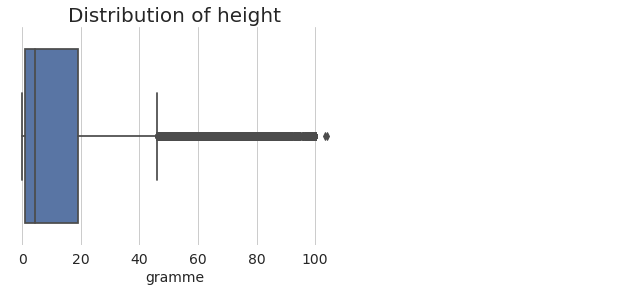

In [52]:
ax = sns.boxplot(data.sugars_100g)

# notation indicating an outlier
ax.annotate('Outlier', xy=(190,0), xytext=(186,-0.05), fontsize=14,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))

# xtick, label, and title
plt.xticks(fontsize=14)
plt.xlabel('gramme', fontsize=14)
plt.title('Distribution of height', fontsize=20)

In [53]:
nrj_outliers = data.loc[data["energy_100g"] > 3800 ]

In [54]:
data.shape

(74416, 17)

In [55]:
data = data.drop(nrj_outliers.index, axis=0)

In [56]:
nrj_outliers = data.loc

In [57]:
sugars_outliers = data.loc[data["sugars_100g"] > 100 ]
sugars_outliers1 = data.loc[data["sugars_100g"] < 0 ]
fiber_outliers = data.loc[data["fiber_100g"] > 100 ]
fiber_outliers1 = data.loc[data["fiber_100g"] < 0 ]
proteins_outliers = data.loc[data["proteins_100g"] > 100 ]
proteins_outliers1 = data.loc[data["proteins_100g"] < 0 ]
sodium_outliers = data.loc[data["sodium_100g"] > 100 ]
sodium_outliers1 = data.loc[data["sodium_100g"] < 0 ]
fat_outliers = data.loc[data["fat_100g"] > 100 ]
fat_outliers1 = data.loc[data["fat_100g"] < 0 ]



## Supprime ttes les valeurs sup 100 et inf 0  

In [58]:
fat_outliers

countries          categories              product_name  energy_100g  \
336897    France  Céréales en grains  Graine de couscous moyen       1482.0   

        sugars_100g  fiber_100g  proteins_100g  salt_100g  sodium_100g  \
336897          2.5         0.0           12.0       0.01     0.003937   

        saturated-fat_100g  fat_100g  nutrition-score-fr_100g  \
336897                 0.3     105.0                     -1.0   

       nutrition_grade_fr  additives_n additives additives_tags  \
336897                  a          NaN       NaN            NaN   

        sodium_to_salt  
336897            0.01

In [59]:
fiber_outliers1.shape

(0, 17)

In [60]:
data = data.drop(sugars_outliers1.index, axis=0)
data = data.drop(sugars_outliers.index, axis=0)
data = data.drop(proteins_outliers.index, axis=0)
data = data.drop(fiber_outliers.index, axis=0)





In [61]:
data.head()

countries                                         categories  \
185    France  Boissons,Boissons gazeuses,Sodas,Boissons sucr...   
189    France                  Snacks sucrés,Confiseries,Bonbons   
190    France                                       en:beverages   
193    France                                                NaN   
194    France                                                NaN   

                                          product_name  energy_100g  \
185                                          Root Beer        215.0   
189      Gotta-have grape, seriously strawberry flavor       1667.0   
190              Thé noir aromatisé violette et fleurs         17.0   
193  Preparation mug cake chocolat-caramel au beurr...       1632.0   
194                                     Mini Confettis       1753.0   

     sugars_100g  fiber_100g  proteins_100g  salt_100g  sodium_100g  \
185         13.6         0.0            0.0     0.0616     0.024200   
189         93.3         0.0            0.0     0.0000     0.000000   
190          0.1         0.0            0.1     0.0010     0.000394   
193         42.0         0.0            7.0     0.9750     0.383858   
194         87.7         0.9            0.6     0.0100     0.003937   

     saturated-fat_100g  fat_100g  nutrition-score-fr_100g nutrition_grade_fr  \
185                 0.0       0.0                     18.0                  e   
189                 0.0       0.0                     14.0                  d   
190                 0.1       0.1                      2.0                  c   
193                 4.5       7.0                     21.0                  e   
194                 0.8       0.0                     14.0                  d   

     additives_n                                          additives  \
185          3.0   [ eau-gazeifiee -> fr:eau-gazeifiee  ]  [ eau...   
189          NaN                                                NaN   
190          0.0   [ the-noir-aromatise-a-la-fleur-de-violette -...   
193          4.0   [ farine-de-ble -> fr:farine-de-ble  ]  [ far...   
194          NaN                                                NaN   

                                        additives_tags  sodium_to_salt  
185                            en:e150,en:e211,en:e999        0.061468  
189                                                NaN        0.000000  
190                                                NaN        0.001000  
193  en:e322,en:e322i,en:e450,en:e473,en:e500,en:e5...        0.975000  
194                                                NaN        0.010000

In [62]:
data.shape

(74344, 17)

/home/apprenant/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of height')

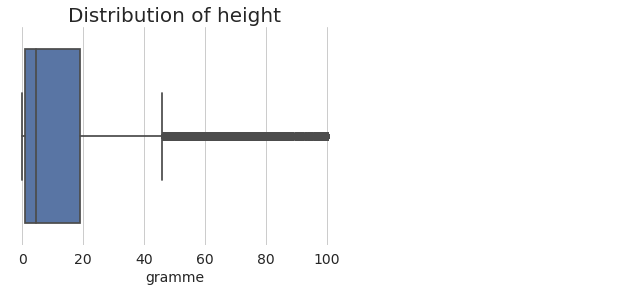

In [63]:
ax = sns.boxplot(data.sugars_100g)

# notation indicating an outlier
ax.annotate('Outlier', xy=(190,0), xytext=(186,-0.05), fontsize=14,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))

# xtick, label, and title
plt.xticks(fontsize=14)
plt.xlabel('gramme', fontsize=14)
plt.title('Distribution of height', fontsize=20)

In [64]:
data.shape

(74344, 17)